**Динамика активности и анализ количества сообщений в телеграмм-чатах, связанных с расстройствами пищевого поведения**

In [231]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import json
import re

file_paths = ['result.json', 'result_0.json', 'result00.json', 'result000.json']

# Создаю пустой список для хранения DataFrame'ов
dataframes = []

# Читаю каждый файл JSON и добавляем его в список
for file_path in file_paths:
    df = pd.read_json(file_path)
    dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)

df=combined_df

In [232]:
# Создаю словарь для данных
d = {'date': [], 'from': [], 'text': []}

# Обрабатываю сообщения
for message in data['messages']:
    if message['type'] == 'message':
        d['date'].append(message['date'])
        d['from'].append(message['from_id'])
        if 'text' in message:
            d['text'].append(message['text'])
        else:
            d['text'].append('')
    else:
        print(message)

# Создаю датафрейм
df = pd.DataFrame(d)

df

{'id': 1, 'type': 'service', 'date': '2021-07-04T18:40:40', 'date_unixtime': '1625413240', 'actor': 'РПП: путь к выздоровлению', 'actor_id': 'channel1560913832', 'action': 'create_channel', 'title': 'РПП: путь к выздоровлению', 'text': '', 'text_entities': []}
{'id': 2, 'type': 'service', 'date': '2021-07-04T18:40:40', 'date_unixtime': '1625413240', 'actor': 'РПП: путь к выздоровлению', 'actor_id': 'channel1560913832', 'action': 'edit_group_photo', 'photo': '(File not included. Change data exporting settings to download.)', 'photo_file_size': 95199, 'width': 640, 'height': 640, 'text': '', 'text_entities': []}
{'id': 282, 'type': 'service', 'date': '2022-03-19T14:42:37', 'date_unixtime': '1647690157', 'actor': 'РПП: путь к выздоровлению', 'actor_id': 'channel1560913832', 'action': 'pin_message', 'message_id': 281, 'text': '', 'text_entities': []}
{'id': 770, 'type': 'service', 'date': '2022-10-09T17:16:46', 'date_unixtime': '1665325006', 'actor': 'РПП: путь к выздоровлению', 'actor_id'

,date,from,text
0,2021-07-04T18:51:00,channel1560913832,
1,2021-07-04T18:51:21,channel1560913832,По мировой статистике булимией страдают от 1 д...
2,2021-07-04T18:51:21,channel1560913832,"Дорогие мои мальчики и девочки, мужчины и женщ..."
3,2021-07-04T18:52:42,channel1560913832,
4,2021-07-04T18:52:56,channel1560913832,"Псевдо-синдром Бартера, это состояние, которое..."
...,...,...,...
36618,2025-03-23T07:05:09,channel1270089583,"[доброе утро, как настроение после взвешивания..."
36619,2025-03-23T08:05:12,channel1270089583,"[{'type': 'custom_emoji', 'text': '➡️', 'docum..."
36620,2025-03-23T14:35:22,channel1270089583,"[{'type': 'custom_emoji', 'text': '➡️', 'docum..."
36621,2025-03-23T17:05:13,channel1270089583,"[{'type': 'hashtag', 'text': '#advice'}, {'typ..."


In [240]:
# Избавляюсь от списков
df['text'] = df['text'].apply(lambda x: ' '.join(str(item) for item in x) if isinstance(x, list) else str(x))

# Удаляю из текста пустые строки
df[df['text'] == '']
df = df[df['text'] != '']

# Преобразую формат даты
df['date'] = pd.to_datetime(df['date'])
df

,date,from,text,count_bulimia,count_anorexia,count_relapse,season
14194,2025-03-23 17:27:07,channel2179526968,"{'type': 'italic', 'text': 'хочешь наконец уви...",0,0,0,Весна
36621,2025-03-23 17:05:13,channel1270089583,"{'type': 'hashtag', 'text': '#advice'} {'type'...",0,0,0,Весна
36620,2025-03-23 14:35:22,channel1270089583,"{'type': 'custom_emoji', 'text': '➡️', 'docume...",0,0,0,Весна
14189,2025-03-23 14:33:37,channel2179526968,"{'type': 'custom_emoji', 'text': '🖐', 'documen...",0,0,0,Весна
11212,2025-03-23 14:08:17,channel1721010540,"{'type': 'bold', 'text': 'Кардиотренировки без...",0,0,0,Весна
...,...,...,...,...,...,...,...
14201,2021-02-16 23:42:03,channel1270089583,"{'type': 'italic', 'text': 'собираем всё в куч...",0,0,0,Зима
14200,2021-02-16 23:41:05,channel1270089583,"{'type': 'italic', 'text': 'раздробление цели ...",0,0,0,Зима
14199,2021-02-16 21:52:59,channel1270089583,"а теперь самое неприятное, что отрицает почти ...",0,0,1,Зима
14198,2021-02-16 21:02:10,channel1270089583,сегодняшними вопросами я сформирую твой старте...,0,0,0,Зима


In [241]:
# Функция для подсчета упоминаний слов с учетом различных форм
def count_words(text, words):
    if isinstance(text, str):
        return sum(len(re.findall(r'\b' + re.escape(word) + r'\b', text.lower())) for word in words)
    return 0

# Список слов для поиска
bulimia_words = ["булимия", "булимии", "булимией", "булимию"]
anorexia_words = ["анорексия", "анорексии", "анорексию", "анорексией"]
relapse_words = ["срыв", "срывы", "срывов", "срыва", "срыву"]

# Добавляю новые столбцов в датафрейм - они будут показывать количество упоминаний слов булимия, анорексия и срыв
df['count_bulimia'] = df['text'].apply(count_words, words=bulimia_words)
df['count_anorexia'] = df['text'].apply(count_words, words=anorexia_words)
df['count_relapse'] = df['text'].apply(count_words, words=relapse_words)
# Вывод датафрейма

df = df.sort_values(by='date', ascending=False)
df

,date,from,text,count_bulimia,count_anorexia,count_relapse,season
14194,2025-03-23 17:27:07,channel2179526968,"{'type': 'italic', 'text': 'хочешь наконец уви...",0,0,0,Весна
36621,2025-03-23 17:05:13,channel1270089583,"{'type': 'hashtag', 'text': '#advice'} {'type'...",0,0,0,Весна
36620,2025-03-23 14:35:22,channel1270089583,"{'type': 'custom_emoji', 'text': '➡️', 'docume...",0,0,0,Весна
14189,2025-03-23 14:33:37,channel2179526968,"{'type': 'custom_emoji', 'text': '🖐', 'documen...",0,0,0,Весна
11212,2025-03-23 14:08:17,channel1721010540,"{'type': 'bold', 'text': 'Кардиотренировки без...",0,0,0,Весна
...,...,...,...,...,...,...,...
14201,2021-02-16 23:42:03,channel1270089583,"{'type': 'italic', 'text': 'собираем всё в куч...",0,0,0,Зима
14200,2021-02-16 23:41:05,channel1270089583,"{'type': 'italic', 'text': 'раздробление цели ...",0,0,0,Зима
14199,2021-02-16 21:52:59,channel1270089583,"а теперь самое неприятное, что отрицает почти ...",0,0,1,Зима
14198,2021-02-16 21:02:10,channel1270089583,сегодняшними вопросами я сформирую твой старте...,0,0,0,Зима


In [242]:
# Создаю новый датафрейм для хранения результатов по годам
years = [2021, 2022, 2023, 2024]
results = {'Year': [], 'Total Bulimia': [], 'Total Anorexia': [], 'Total Relapse': []}

df['date'] = pd.to_datetime(df['date'])
# Считаю упоминания булимии, анорексии и срывов по годам
for year in years:
    df_year = df[df['date'].dt.year == year]
    total_bulimia = df_year['count_bulimia'].sum()
    total_anorexia = df_year['count_anorexia'].sum()
    total_relapse = df_year['count_relapse'].sum()

    results['Year'].append(year)
    results['Total Bulimia'].append(total_bulimia)
    results['Total Anorexia'].append(total_anorexia)
    results['Total Relapse'].append(total_relapse)

results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))

 Year  Total Bulimia  Total Anorexia  Total Relapse
 2021             86              97             59
 2022            125             191            182
 2023             91             160            215
 2024             94             166            264


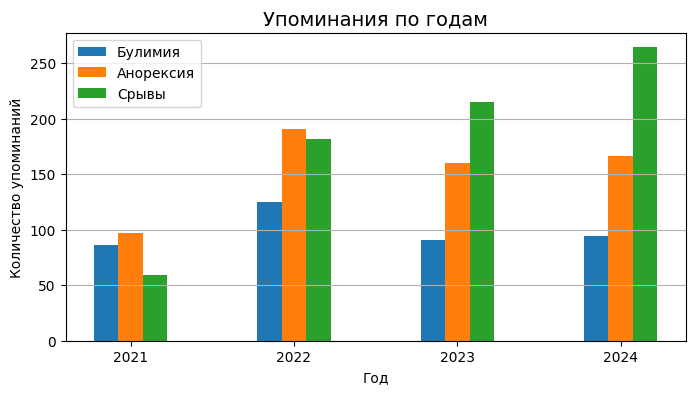

In [243]:
# Создаю диаграмму по количеству сообщений о срывах, булимии и анорексии по годам
years = results_df['Year']
bulimia = results_df['Total Bulimia']
anorexia = results_df['Total Anorexia']
relapse = results_df['Total Relapse']

bar_width = 0.15

r1 = np.arange(len(years))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(8, 4))
plt.bar(r1, bulimia, width=bar_width, label='Булимия')
plt.bar(r2, anorexia, width=bar_width, label='Анорексия')
plt.bar(r3, relapse, width=bar_width, label='Срывы')


plt.title('Упоминания по годам', fontsize=14)
plt.xlabel('Год', fontsize=10)
plt.ylabel('Количество упоминаний', fontsize=10)
plt.xticks([r + bar_width for r in range(len(years))], years)
plt.legend()
plt.grid(True, axis='y')

plt.show()

In [238]:
# Добавляю столбец с временем года
def get_season(month):
    if month in [12, 1, 2]:
        return 'Зима'
    elif month in [3, 4, 5]:
        return 'Весна'
    elif month in [6, 7, 8]:
        return 'Лето'
    elif month in [9, 10, 11]:
        return 'Осень'

df['season'] = df['date'].dt.month.apply(get_season)

# Группирую по времени года и считаю количество сообщений
season_counts = df['season'].value_counts().sort_index()

print(season_counts)

season
Весна    4289
Зима     4584
Лето     4658
Осень    4655
Name: count, dtype: int64


In [129]:
# Создаю переменные для подсчет количества сообщений каждого времени года
winter_count = season_counts.get('Зима', 0)
spring_count = season_counts.get('Весна', 0)
summer_count = season_counts.get('Лето', 0)
autumn_count = season_counts.get('Осень', 0)

# Вывожу результаты
print(f"Зима: {winter_count} сообщений")
print(f"Весна: {spring_count} сообщений")
print(f"Лето: {summer_count} сообщений")
print(f"Осень: {autumn_count} сообщений")

Зима: 4584 сообщений
Весна: 4289 сообщений
Лето: 4658 сообщений
Осень: 4655 сообщений


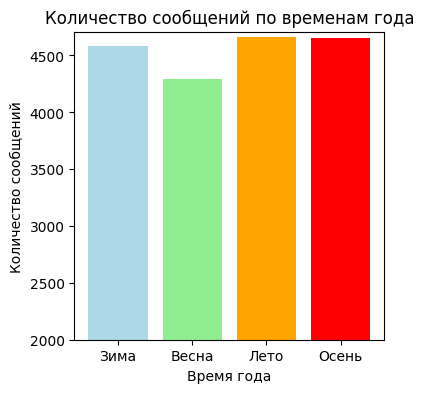

In [244]:
seasons = ['Зима', 'Весна', 'Лето', 'Осень']
counts = [winter_count, spring_count, summer_count, autumn_count]

# Создаю диаграмму по количеству сообщений в зависимости от времени года
plt.figure(figsize=(4, 4))
plt.bar(seasons, counts, color=['lightblue', 'lightgreen', 'orange', 'red'])

plt.ylim(2000, max(counts) + 50)

plt.title('Количество сообщений по временам года', fontsize=12)  # Заголовок
plt.xlabel('Время года', fontsize=10)  # Подпись оси X
plt.ylabel('Количество сообщений', fontsize=10)  # Подпись оси Y


plt.show()